In [23]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


--- TRAIN DATA ---
DIV2K_train_LR_difficult: 800 images, 251.00 MB
Unique dimensions: 94, Min dimension: (510, 162), Max dimension: (510, 510)
----------------------------------------
DIV2K_train_LR_mild: 800 images, 262.84 MB
Unique dimensions: 94, Min dimension: (510, 162), Max dimension: (510, 510)
----------------------------------------
DIV2K_train_LR_wild: 3200 images, 1029.63 MB
Unique dimensions: 94, Min dimension: (510, 162), Max dimension: (510, 510)
----------------------------------------
DIV2K_train_LR_x8: 800 images, 62.58 MB
Unique dimensions: 94, Min dimension: (255, 81), Max dimension: (255, 255)
----------------------------------------

--- EVAL DATA ---
DIV2K_valid_LR_difficult: 100 images, 32.04 MB
Unique dimensions: 24, Min dimension: (510, 204), Max dimension: (510, 510)
----------------------------------------
DIV2K_valid_LR_mild: 100 images, 33.66 MB
Unique dimensions: 24, Min dimension: (510, 204), Max dimension: (510, 510)
------------------------------------

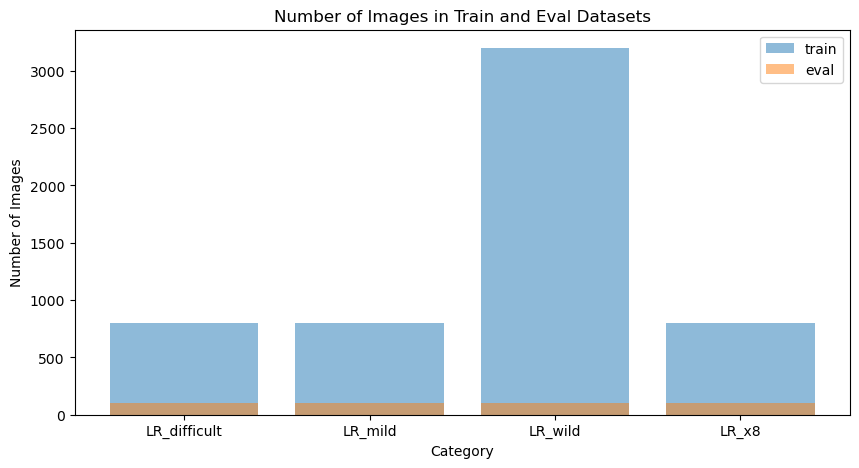


--- Train-Eval Percentages ---
LR_difficult: Train = 88.89%, Eval = 11.11%
LR_mild: Train = 88.89%, Eval = 11.11%
LR_wild: Train = 96.97%, Eval = 3.03%
LR_x8: Train = 88.89%, Eval = 11.11%


In [24]:
# Define paths for train and eval datasets
train_path = 'train/'
eval_path = 'eval/'

# The eval folder names are different
train_categories = ['DIV2K_train_LR_difficult', 'DIV2K_train_LR_mild', 'DIV2K_train_LR_wild', 'DIV2K_train_LR_x8']
eval_categories = ['DIV2K_valid_LR_difficult', 'DIV2K_valid_LR_mild', 'DIV2K_valid_LR_wild', 'DIV2K_valid_LR_x8']

# Initialize counters and data holders for train and eval
data_info = {"train": {}, "eval": {}}

# Function to explore each dataset (train or eval)
def explore_data(base_path, categories, data_type):
    for category in categories:
        folder = os.path.join(base_path, category)
        images = os.listdir(folder)

        total_size = 0
        dimensions = set()

        for img_name in images:
            img_path = os.path.join(folder, img_name)
            img = Image.open(img_path)
            total_size += os.path.getsize(img_path)  # in bytes
            dimensions.add(img.size)

        # Find the min and max dimensions
        min_dimension = min(dimensions, key=lambda x: x[0] * x[1])
        max_dimension = max(dimensions, key=lambda x: x[0] * x[1])

        # Store the info for the infographic
        data_info[data_type][category] = {
            "num_images": len(images),
            "total_size_MB": total_size / (1024 * 1024),  # Convert size to MB
            "unique_dimensions_count": len(dimensions),
            "min_dimension": min_dimension,
            "max_dimension": max_dimension
        }

# Explore both train and eval datasets
explore_data(train_path, train_categories, "train")
explore_data(eval_path, eval_categories, "eval")

# Calculate train-eval percentages
def calculate_percentage(train_num, eval_num):
    total = train_num + eval_num
    if total == 0:
        return 0, 0
    train_percent = (train_num / total) * 100
    eval_percent = (eval_num / total) * 100
    return train_percent, eval_percent

# Display the dataset information for both train and eval
for data_type in ["train", "eval"]:
    print(f"\n--- {data_type.upper()} DATA ---")
    for category, info in data_info[data_type].items():
        print(f"{category}: {info['num_images']} images, {info['total_size_MB']:.2f} MB")
        print(f"Unique dimensions: {info['unique_dimensions_count']}, Min dimension: {info['min_dimension']}, Max dimension: {info['max_dimension']}")
        print('-' * 40)

# Create bar charts for number of images in train and eval datasets
plt.figure(figsize=(10, 5))
for data_type in ["train", "eval"]:
    categories_labels = [cat.replace("DIV2K_train_", "").replace("DIV2K_valid_", "") for cat in train_categories]
    image_counts = [data_info[data_type][cat]['num_images'] for cat in (train_categories if data_type == "train" else eval_categories)]
    
    plt.bar(categories_labels, image_counts, alpha=0.5, label=data_type)

plt.title('Number of Images in Train and Eval Datasets')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.legend()
plt.show()

# Calculate and display train-eval percentages
print("\n--- Train-Eval Percentages ---")
for i, category in enumerate(train_categories):
    train_count = data_info['train'][category]['num_images']
    eval_count = data_info['eval'][eval_categories[i]]['num_images']
    
    train_percent, eval_percent = calculate_percentage(train_count, eval_count)
    print(f"{category.replace('DIV2K_train_', '')}: Train = {train_percent:.2f}%, Eval = {eval_percent:.2f}%")


#find outlier dimensioners

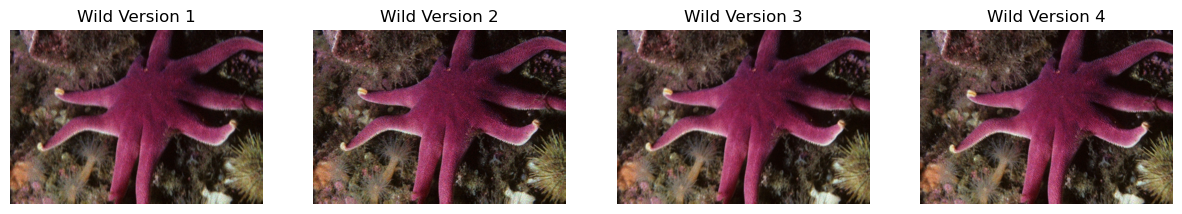

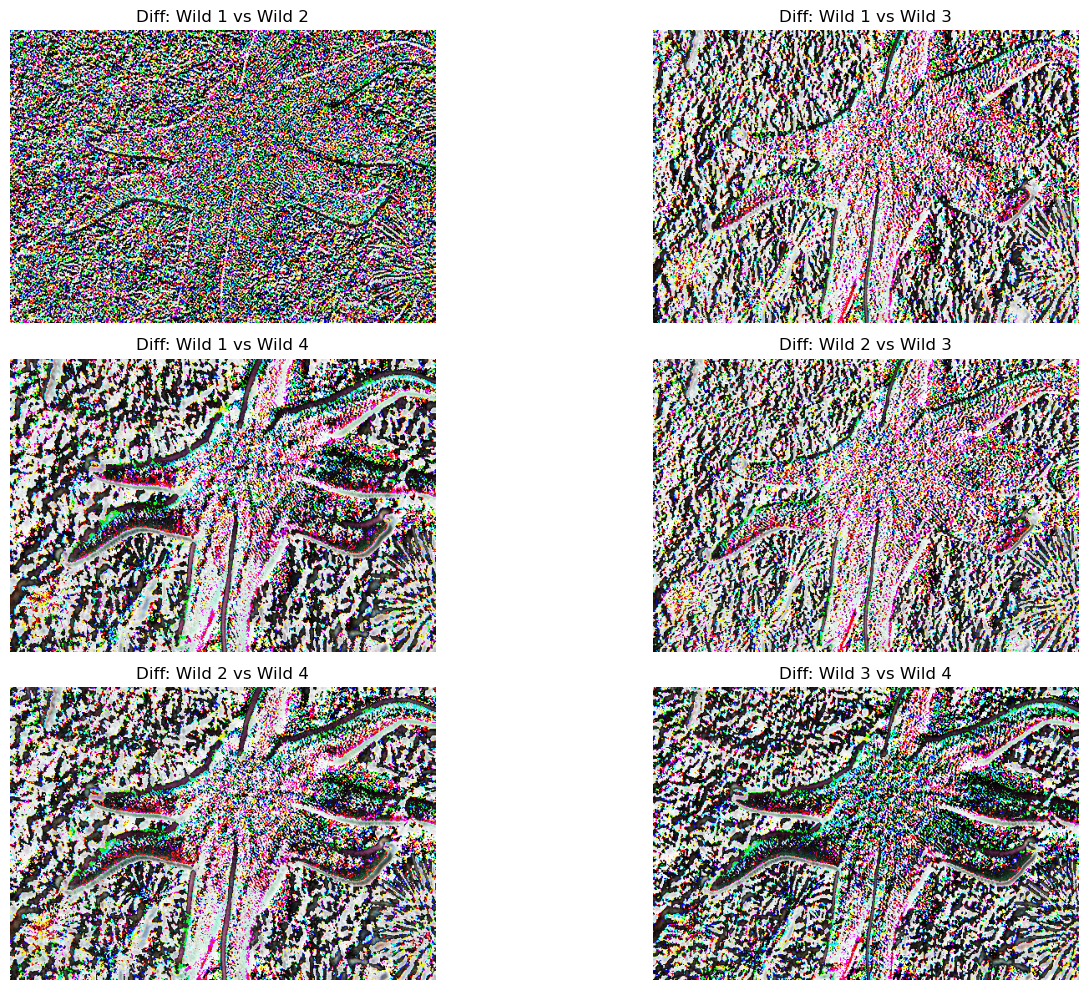

In [25]:
# Example comparison of the 'wild' versions
wild_folder = os.path.join(train_path, 'DIV2K_train_LR_wild')

# Load 4 versions of the same image
wild_img_base = '0001x4w'
wild_imgs = [Image.open(os.path.join(wild_folder, wild_img_base + f"{i}.png")) for i in range(1, 5)]

# Display all 4 wild versions side by side
plt.figure(figsize=(15, 5))
for i, img in enumerate(wild_imgs):
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(f"Wild Version {i+1}")
    plt.axis('off')
plt.show()

# Calculate and display pixel differences between each pair of wild versions
plt.figure(figsize=(15, 10))
subplot_idx = 1
for i in range(4):
    for j in range(i + 1, 4):
        # Calculate the absolute difference between two images
        diff_img = np.abs(np.array(wild_imgs[i]) - np.array(wild_imgs[j]))
        
        # Display the difference image
        plt.subplot(3, 2, subplot_idx)  # Update subplot index correctly
        plt.imshow(diff_img, cmap='gray')
        plt.title(f"Diff: Wild {i+1} vs Wild {j+1}")
        plt.axis('off')
        subplot_idx += 1

plt.tight_layout()
plt.show()
